**Dependencies**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras import layers
from keras.models import Sequential

In [ ]:
os.getcwd()
os.chdir("flower_images")

**Loading Data**

In [ ]:
train_data =tf.keras.preprocessing.image_dataset_from_directory(
  'training/',
  seed=42,
  shuffle=True,
  image_size=(200, 200),
  batch_size=16)

Found 271 files belonging to 3 classes.


In [ ]:
val_data =tf.keras.preprocessing.image_dataset_from_directory(
  'validation/',
  seed=42,
  shuffle=True,
  image_size=(200, 200),
  batch_size=16)

Found 59 files belonging to 3 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

['lotus', 'rose', 'sunflower']


**Visualization**

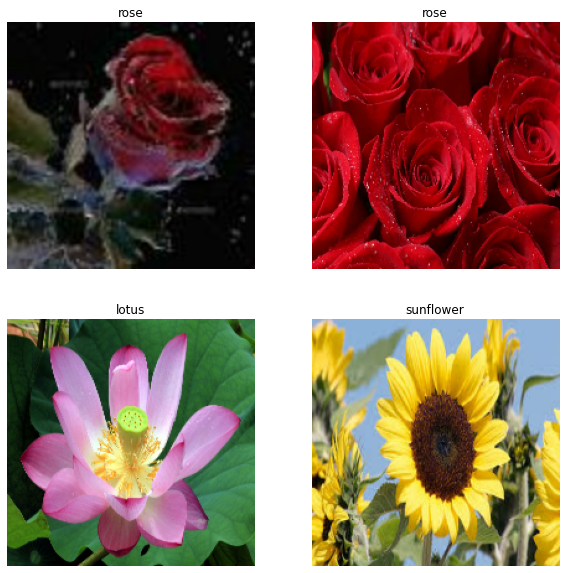

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Model Building**

In [ ]:
model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(200,200, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               20480128  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

**Training**

In [ ]:
model.fit(train_data,validation_data=val_data,epochs=3)

Epoch 1/3
17/17 [==============================] - 18s 1s/step - loss: 1330.5374 - accuracy: 0.5203 - val_loss: 24.8727 - val_accuracy: 0.6610
Epoch 2/3
17/17 [==============================] - 18s 1s/step - loss: 3.9905 - accuracy: 0.8266 - val_loss: 2.2927 - val_accuracy: 0.8983
Epoch 3/3
17/17 [==============================] - 18s 1s/step - loss: 0.3956 - accuracy: 0.9373 - val_loss: 0.5464 - val_accuracy: 0.9153


**Testing**

lotus   87.43373155593872  % sure


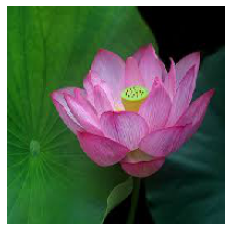

In [ ]:
test_img_path='image.jpg'

img = tf.keras.preprocessing.image.load_img(test_img_path, target_size=(200, 200))

plt.imshow(img)
plt.axis("off")

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 
pred = model.predict(img_array)
print(class_names[np.argmax(pred)]," ", 100 * np.max(pred)," % sure")